## FRAUD DETECTION USING MACHINE LEARNING CLASSIFICATION ALGORITHMS

# Seps to build a model to detect fraud
1. Define the problem
2. Outline the Methods to detect fraud--(classification method in this case)
1. read the data -- pd.read_csv()
2. examine the first 5 records -- df.head(5)
3. examine the information about the variables (datatypes, No of variables..)  --df.info
4. Examine Missing values and analyze the variables with more than 10% missing values
5. Examine the summary statistics about the variables
6. Examine the distribution of the response variable to understand if there is an imbalance about the classes
7. Examine the distribution of the response variable using scatter plot
8. Examine the summary statistics if some variables need to be normalized
9. Perform frequency distribution table for categorical variables
10. Check for outliers for the numeric features
11. Examine the relationship between features
12. Deal with an imbalanced dataset
13. Fit Logistic regression, random forest model using scikit-learn. 
    a. import the model from the ensemble package.
    b. Split the balanced dataset into training and test data
    c. Define the model. 
    d. Fit the model to the training datasetset. 
    e. Obtain model predictions by running it on the test set.
    f. perform a measure of performance, Use accuracy, by comparing the predictions to the actual labels under y_test.


In [195]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [196]:
# Import pandas and read csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
df = pd.read_csv("C:/Fraud Detection/creditcard_sampledata_1.csv")

In [197]:
df.head(5)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0


In [198]:
df.shape

(5050, 31)

### Removing variables which are not useful for the Fraud analysis

In [199]:
#df.drop(columns=['Unnamed: 0','Time'],inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)

In [200]:
## Examining the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      5050 non-null   float64
 1   V2      5050 non-null   float64
 2   V3      5050 non-null   float64
 3   V4      5050 non-null   float64
 4   V5      5050 non-null   float64
 5   V6      5050 non-null   float64
 6   V7      5050 non-null   float64
 7   V8      5050 non-null   float64
 8   V9      5050 non-null   float64
 9   V10     5050 non-null   float64
 10  V11     5050 non-null   float64
 11  V12     5050 non-null   float64
 12  V13     5050 non-null   float64
 13  V14     5050 non-null   float64
 14  V15     5050 non-null   float64
 15  V16     5050 non-null   float64
 16  V17     5050 non-null   float64
 17  V18     5050 non-null   float64
 18  V19     5050 non-null   float64
 19  V20     5050 non-null   float64
 20  V21     5050 non-null   float64
 21  V22     5050 non-null   float64
 22  

### Investigating missing values

In [201]:
df.isna().sum().sort_values(ascending=False).head(5)

V1        0
V2        0
Amount    0
V28       0
V27       0
dtype: int64

### Examining the distribution of Response variable("Class") to inspect if there is an imbalance in the Class feature

In [202]:
# Fraud and Legit ratios vs total observation
print(df['Class'].value_counts() / df['Class'].count())

0    0.990099
1    0.009901
Name: Class, dtype: float64


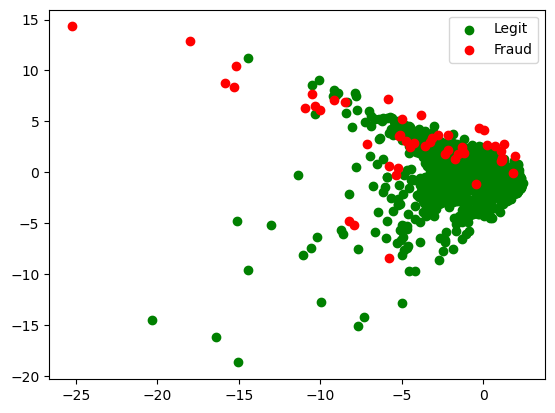

In [203]:
plt.scatter(df.V1.where(df.Class==0),df.V2.where(df.Class==0), label='Legit',color='g') ## ploting V1 vs V2 for legit transactions
plt.scatter(df.V1.where(df.Class==1),df.V2.where(df.Class==1), label='Fraud',color='r') #ploting V1 vs V2 for fraud transactions
plt.legend()

## We can see that there is an imbalance in the Response(Class feature). We need to fix the issue before we fit a model

### Descriptive Statistics

In [204]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,...,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,-0.014675,0.044325,-0.035144,0.002494,-0.046625,-0.046340,-0.043020,-0.008398,-0.027331,-0.056943,...,-0.003516,-0.009421,-0.004147,-0.001200,-0.003314,-0.004836,-0.005726,0.002482,86.117232,0.009901
std,1.952784,1.558235,1.691458,1.493592,1.321320,1.254301,1.338170,1.323247,1.134506,1.278092,...,0.756735,0.724749,0.601276,0.599400,0.517363,0.481913,0.411055,0.302719,227.210259,0.099020
min,-25.266355,-18.701995,-26.823673,-4.575708,-18.664251,-6.357009,-23.783470,-41.484823,-8.504285,-17.141514,...,-20.262054,-5.532541,-17.026156,-2.307453,-3.308049,-1.715640,-7.976100,-5.048979,0.000000,0.000000
25%,-0.926226,-0.589562,-0.873696,-0.871759,-0.733235,-0.777552,-0.571678,-0.211263,-0.651215,-0.541561,...,-0.231508,-0.558904,-0.161166,-0.354973,-0.316947,-0.331584,-0.070963,-0.052133,4.990000,0.000000
50%,0.009592,0.088726,0.168377,-0.027034,-0.060932,-0.304225,0.036753,0.000985,-0.052724,-0.109888,...,-0.035204,-0.013332,-0.011305,0.038272,0.019200,-0.059882,0.003521,0.012842,20.260000,0.000000
75%,1.310062,0.809298,1.017166,0.763626,0.603678,0.356664,0.594029,0.313264,0.568374,0.437051,...,0.196481,0.509243,0.146835,0.441278,0.348177,0.228486,0.095662,0.077357,75.000000,0.000000
max,2.422508,14.323254,3.760965,11.885313,9.880564,7.473970,9.288494,16.633103,8.054123,12.562347,...,19.283602,5.805795,13.218751,3.535179,3.590787,2.961609,4.623508,9.876371,4584.880000,1.000000


In [205]:
df.describe().loc[['min','max']]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
min,-25.266355,-18.701995,-26.823673,-4.575708,-18.664251,-6.357009,-23.783470,-41.484823,-8.504285,-17.141514,...,-20.262054,-5.532541,-17.026156,-2.307453,-3.308049,-1.715640,-7.976100,-5.048979,0.00,0.0
max,2.422508,14.323254,3.760965,11.885313,9.880564,7.473970,9.288494,16.633103,8.054123,12.562347,...,19.283602,5.805795,13.218751,3.535179,3.590787,2.961609,4.623508,9.876371,4584.88,1.0


### Examining the relationship between variables (also important to inspect multicollinearity)

In [206]:
df.corr().head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.208046,0.112920,-0.044880,0.124098,0.009994,0.189397,0.000990,0.053254,0.169756,...,0.020187,-0.031568,-0.035292,0.010977,0.027121,0.012281,0.063151,0.023628,-0.166388,-0.254561
V2,-0.208046,1.000000,-0.158028,0.130166,-0.035907,-0.089209,-0.145099,0.016342,-0.046163,-0.158653,...,-0.013372,0.006442,0.040665,0.017742,0.023787,0.001233,0.028788,-0.046172,-0.536444,0.210337
V3,0.112920,-0.158028,1.000000,-0.148049,0.127841,0.100184,0.310937,-0.072739,0.133084,0.260534,...,-0.015989,-0.023994,-0.018938,0.015487,0.013147,-0.015003,-0.024336,0.013432,-0.138791,-0.429185
V4,-0.044880,0.130166,-0.148049,1.000000,-0.120720,-0.016338,-0.175523,0.025944,-0.064791,-0.167784,...,0.031084,0.009375,0.017811,0.026648,-0.021581,0.007397,0.000937,-0.007689,0.079917,0.323109
V5,0.124098,-0.035907,0.127841,-0.120720,1.000000,0.135528,0.376758,-0.072305,0.094999,0.151376,...,-0.017983,-0.016458,-0.019905,-0.011324,0.007643,0.006196,0.051520,0.005765,-0.313230,-0.248258


import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

### Examine the Total Fraud Amount 

In [207]:
df.groupby('Class').Amount.describe().loc[1]
df.groupby('Class').Amount.describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,5000.0,85.843714,227.144663,0.0,4.9975,20.325,74.9600,4584.88
1,50.0,113.469000,234.409091,0.0,1.0000,10.605,105.1725,1402.16


#### We can see that the maximum amount of money(transaction) labeled as fraud is a  354.33USD  and  75Pct of Fraud cases are less than  32 USD

# Perform Outlier detection on the Amount of money 

In [208]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
print('first quartile-',Q1,'\nthird quartile-',Q3,'\nInter Quartile Range',IQR)

print('lower level outlier border :', (Q1 - 1.5 * IQR))
print('upper level outlier border :', (Q3 + 1.5 * IQR))

Non_Outliers = df[~((df['Amount'] < (Q1 - 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR)))]
Outliers = df[((df['Amount'] < (Q1 - 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR)))]


first quartile- 4.99 
third quartile- 75.0 
Inter Quartile Range 70.01
lower level outlier border : -100.02500000000002
upper level outlier border : 180.01500000000001


## Summary of Fraud Amount based on the outliers

1. How many records are Normal(NOn-Outliers)
2. How many records are Outliers based on the Amount of money(transaction)
3. How many records are labeled "Fraud" from observations which are not outliers
4. What is the ratio of "Fraud" vs "Legit" from observations which are not outliers
5. How many records are labeled "Fraud" from observations which are outliers
6. What is the ratio of "Fraud" vs "Legit" from observations which are outliers

In [209]:
Non_Outliers.shape[0] # 1. Number of Non outlier records based on the Amount
Outliers.shape[0] # 2. Number of Outlier records based on the Amount
Non_Outliers[Non_Outliers.Class==1].shape[0] # 3. Number of Fraud detected from Non outlier records is only 14
Non_Outliers[Non_Outliers.Class==1].shape[0]/Non_Outliers.shape[0] # 5. less than 0.2 percent of records from Non outliers are Fraud
Outliers[Outliers.Class==1].shape[0] # 6. No of Recrods labeled fraud from the Outliers
Outliers[Outliers.Class==1].shape[0]/Outliers.shape[0] # less than 0.3 pct of recors labeled Fraud from ouliers

0.014414414414414415

In [210]:
print(Non_Outliers.shape[0])

4495


In [211]:
print("Number of Non outlier records based on the Amount: %d,\nNumber of Outlier records based on the Amount: %d" % (Non_Outliers.shape[0], Outliers.shape[0]))

Number of Non outlier records based on the Amount: 4495,
Number of Outlier records based on the Amount: 555


## Preparing the dataset for Modeling

#### baseline model

In [212]:
X = df.drop(columns=['Class']).values
y = df['Class'].values

In [213]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Import necessary modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=0)
base_logistic = LogisticRegression()
base_logistic.fit(X_train,y_train)
base_y_pred = base_logistic.predict(X_test)


# Predict probabilities
base_probs = base_logistic.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('************************************')
print(roc_auc_score(y_test, base_probs[:,1])) 
print('************************************')
print(classification_report(y_test, base_y_pred))
print(confusion_matrix(y_test, base_y_pred))

************************************
0.9995348837209301
************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       0.90      0.90      0.90        10

    accuracy                           1.00      1515
   macro avg       0.95      0.95      0.95      1515
weighted avg       1.00      1.00      1.00      1515

[[1504    1]
 [   1    9]]


An imbalanced datasets in machine learning can affect the performance and accuracy of the model. An imbalanced dataset is one where the number of observations in one class is significantly larger or smaller than the number of observations in another class.

### Some of the approaches to deal with imbalanced datasets:

    1. Resampling: You can either oversample the minority class or undersample the majority class to balance the dataset. Oversampling can be done by duplicating examples from the minority class or by generating new examples. Undersampling can be done by randomly selecting a subset of examples from the majority class. However, resampling can lead to overfitting or underfitting the model.

    2. Class weighting: You can assign higher weights to the minority class and lower weights to the majority class during model training. This can be done in several machine learning frameworks by setting the class_weight parameter.

    3. Data augmentation: You can generate new examples for the minority class using techniques such as rotation, scaling, and flipping. This can increase the size of the minority class and balance the dataset.

    4. Ensemble methods: You can combine multiple models that are trained on different subsets of the data. This can improve the accuracy of the model and reduce the impact of the imbalanced dataset.

    5. Choosing appropriate evaluation metrics: Accuracy is not always the best metric to evaluate the performance of a model on imbalanced datasets. Other metrics such as precision, recall, F1 score, and AUC-ROC can provide a better evaluation of the model's performance.


### Resampling Using Synthetic minority oversampling technique(SMOTE) and Pipeline

#### SMOTE generates new examples for the minority class by interpolating between existing examples. It does this by selecting pairs of examples from the minority class and interpolating between them to create new examples. This can reduce the risk of overfitting as the model sees new examples, but it can also lead to the creation of noisy examples.

In [214]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
import imblearn

overfit = SMOTE()
X_res,y_res = overfit.fit_resample(X,y)
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [215]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train,y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1505
           1       0.44      0.70      0.54        10

    accuracy                           0.99      1515
   macro avg       0.72      0.85      0.77      1515
weighted avg       0.99      0.99      0.99      1515

Confusion matrix:
 [[1496    9]
 [   3    7]]


### Comparing the unbalanced and balanced dataset using Numerical and graphical technique

Compare SMOTE to original data
the value counts of old and new data, and plot the two scatter plots of the data side by side. 

##### Define a function to compare the original and the resampled datasets.

In [216]:
def compare_plot(X,y,X_resampled,y_resampled, method):
    # Start a plot figure
    f, (ax1, ax2) = plt.subplots(1, 2)
    # sub-plot number 1, this the original(normal) data
    c0 = ax1.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0",alpha=0.5)
    c1 = ax1.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1",alpha=0.5, c='r')
    ax1.set_title('Original set')
    
    # sub-plot number 2, this is the oversampled data
    ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=.5)
    ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=.5,c='r')
    ax2.set_title(method)
    # some settings and ready to go
    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center', ncol=2, labelspacing=0.)
    plt.tight_layout(pad=3)
    return plt.show()

0    5000
1      50
dtype: int64
0    5000
1    5000
dtype: int64


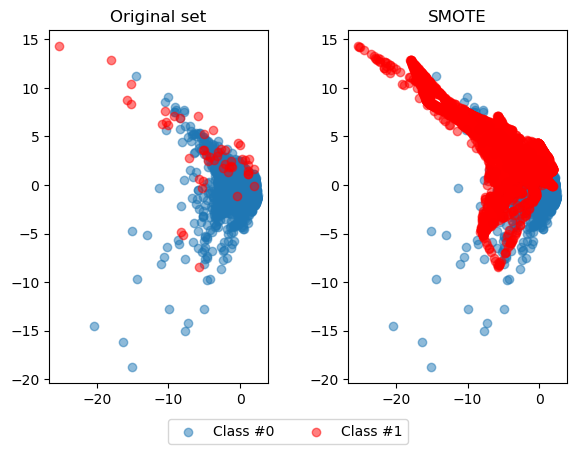

In [217]:
# original labels y
print(pd.value_counts(pd.Series(y)))

# Resampled label y_res
print(pd.value_counts(pd.Series(y_res)))

# Run compare_plot
compare_plot(X,y,X_res,y_res, method='SMOTE')

# PART 2

In [218]:
# Import pandas and read csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
df2 = pd.read_csv("C:/Fraud Detection/creditcard_sampledata_2.csv")

### Baseline 

Natural hit rate
how prevalent fraud is in the dataset, to understand what the "natural accuracy" is, if we were to predict everything as non-fraud. It's is important to understand which level of "accuracy" you need to "beat" in order to get a better prediction than by doing nothing. 

In [219]:
# Count the total number of observations from the length of y
#total_obs = y.size
y = df2.Class.values
total_obs = y.size

# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)


95.8904109589041


## Random forest classifier for fraud detection as the "baseline" model to try to improve 

In [220]:
df2.head(5)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,221547,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,184524,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,91201,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,26115,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,201292,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [221]:
X = df2.drop(columns=['Unnamed: 0','Class']).values
y = df2.Class.values

In [222]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = RandomForestClassifier(random_state=5)
model.fit(X_train,y_train)
predicted = model.predict(X_test)

#### Performance Evaluation

Accuracy can be misleading in the case of fraud detection. With highly imbalanced fraud data, the AUROC curve is a more reliable performance metric, used to compare different classifiers. Moreover, the classification report tells us about the precision and recall of our model, whilst the confusion matrix actually shows how many fraud cases you can predict correctly. 

In [223]:
# Predict probabilities
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9697317927427505
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.80      0.88        91

    accuracy                           0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  18   73]]


We can also plot a Precision-Recall curve, to investigate the trade-off between the two in our model. 
    In this curve Precision and Recall are inversely related
    As Precision increases, Recall falls and vice-versa. 
    A balance between these two needs to be achieved in our model to avoid many false positives.
    To achieve this and to compare performance, the precision-recall curves come in handy.

In [224]:
# Calculate average precision and the PR curve
from sklearn.metrics import average_precision_score, precision_recall_curve
#Precision = TP/(TP+FP)
#Recall = TP/(TP+FN)
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test,predicted)

In [225]:
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()


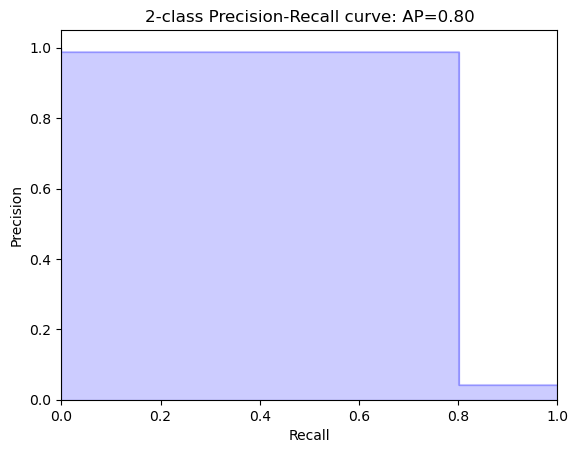

In [226]:
# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

#### The AUROC answers the question: "How well can this classifier be expected to perform in general, at a variety of different baseline probabilities?" but precision and recall don't.

The ROC curve plots the true positives vs. false positives , for a classifier, as its discrimination threshold is varied. Since, a random method describes a horizontal curve through the unit interval, it has an AUC of 0.5. Minimally, classifiers should perform better than this, and the extent to which they score higher than one another (meaning the area under the ROC curve is larger), they have better expected performance.

## Model adjustments using class weights


A simple way to adjust the random forest model to deal with highly imbalanced fraud data, is to use the class_weights option when defining your sklearn model. However, as you will see, it is a bit of a blunt force mechanism and might not work for your very special case.

In this exercise you'll explore the weight = "balanced_subsample" mode the Random Forest model from the earlier exercise. You already have split your data in a training and test set, i.e X_train, X_test, y_train, y_test are available. The metrics function have already been imported.

In [227]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the roc_auc_score, the classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9604599783256286
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.81      0.89        91

    accuracy                           0.99      2190
   macro avg       0.99      0.91      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  17   74]]


### Adjusting your Random Forest to fraud detection- using manual adjustment of the weights

In [228]:
# Set the model options
'''
setting the weight option to the ratio to 1 to 12 for the non-fraud and fraud cases 
setting the split criterion to 'entropy'.
setting the maximum depth to 10.
setting the minimal samples in leaf nodes to 10.
setting the number of trees to use in the model to 20.'''

model = RandomForestClassifier(bootstrap=True, class_weight={0:1, 1:12}, criterion='entropy',
max_depth=10,
min_samples_leaf=10, 
n_estimators=20, n_jobs=-1, random_state=5)


def get_model_results(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    probs = model.predict_proba(X_test)
    print (classification_report(y_test, predicted))
    print (confusion_matrix(y_test, predicted))

get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.94      0.84      0.88        91

    accuracy                           0.99      2190
   macro avg       0.97      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2094    5]
 [  15   76]]


## GridSearchCV to find optimal parameters

In [229]:
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30], 
              'max_features': ['auto', 'log2'],  
              'max_depth': [4, 8], 
              'criterion': ['gini', 'entropy']
}

model  = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model and Fit the model to our training data. then obtain best parameters
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

The best parameters for our model are that the split criterion should be set to 'gini', the number of estimators (trees) should be 30, the maximum depth of the model should be 8 and the maximum features should be set to "auto".

#### MOdel Performance

In [230]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, criterion='gini',
            max_depth=8, max_features='auto',  min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.94      0.84      0.88        91

    accuracy                           0.99      2190
   macro avg       0.97      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2094    5]
 [  15   76]]


## Ensemble method

Combining three algorithms into one model with the VotingClassifier to improve overall performance and detect more fraud. The first model, the Logistic Regression, has a slightly higher recall score than our optimal Random Forest model, but gives a lot more false positives. We'll also add a Decision Tree with balanced weights to it. 

In [231]:
# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2099
           1       0.66      0.88      0.75        91

    accuracy                           0.98      2190
   macro avg       0.83      0.93      0.87      2190
weighted avg       0.98      0.98      0.98      2190

[[2058   41]
 [  11   80]]


#### Combining Three models to improve the performance of Random Forest model

In [232]:
# Import the package
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
            min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='soft')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2099
           1       0.90      0.86      0.88        91

    accuracy                           0.99      2190
   macro avg       0.95      0.93      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2090    9]
 [  13   78]]


#### Adjust weights within the Voting Classifier
Voting Classifier improves fraud detection performance model, by combining good aspects from multiple models. 
By increasing or decreasing weights we can play with how much emphasis you give to a particular model relative to the rest. This comes in handy when a certain model has overall better performance than the rest, but you still want to combine aspects of the others to further improve your results.

In [233]:
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1, 4, 1], flatten_transform=True)
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.94      0.86      0.90        91

    accuracy                           0.99      2190
   macro avg       0.97      0.93      0.95      2190
weighted avg       0.99      0.99      0.99      2190

[[2094    5]
 [  13   78]]


In [234]:
pd.crosstab(y_test, predicted)

col_0,0,1
row_0,,
0,2098,1
1,17,74


We can see that the model results don't improve drastically. We now have 3 less false positives, but now 19 in stead of 18 false negatives, i.e. cases of fraud we are not catching. If we mostly care about catching fraud, and not so much about the false positives, this does actually not improve our model at all, albeit a simple option to try. In the next exercises you'll see how to more smartly tweak your model to focus on reducing false negatives and catch more fraud.

What's the benefit of the performance metric ROC curve (AUROC) versus Precision and Recall?
The three benefits of using Random Forests over Decision Trees:

Reduced overfitting: Random Forests build multiple Decision Trees on different subsets of data and features, and then combine them to make predictions. This reduces overfitting, which occurs when a model is too complex and fits noise in the training data instead of the underlying patterns.

Better accuracy: By combining multiple Decision Trees, Random Forests are less sensitive to noise and outliers in the data. This can lead to better accuracy and generalization performance.

Feature importance: Random Forests can calculate feature importance, which is the contribution of each feature to the model's predictions. This can help identify which features are most important for the problem at hand, and can guide feature selection and engineering.